In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import os
data_path = "data\wfp_food_prices_afg.csv"
path = os.path.join(".", data_path)
data = pd.read_csv(data_path)

In [3]:
data_path

'data\\wfp_food_prices_afg.csv'

## Take a look of the data

In [4]:
data.head() 

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,37.116638,70.580022,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,150000.0,3205.7378
2,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,36.725116,67.109571,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,100000.0,2137.1586
3,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Bread,KG,actual,Retail,AFN,15.63,0.334
4,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat,KG,actual,Retail,AFN,9.13,0.1951


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41085 entries, 0 to 41084
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       41085 non-null  object
 1   admin1     41085 non-null  object
 2   admin2     41085 non-null  object
 3   market     41085 non-null  object
 4   latitude   41085 non-null  object
 5   longitude  41085 non-null  object
 6   category   41085 non-null  object
 7   commodity  41085 non-null  object
 8   unit       41085 non-null  object
 9   priceflag  41085 non-null  object
 10  pricetype  41085 non-null  object
 11  currency   41085 non-null  object
 12  price      41085 non-null  object
 13  usdprice   41085 non-null  object
dtypes: object(14)
memory usage: 4.4+ MB


In [6]:
print(data.shape)
data = data.iloc[1:]
print(data.shape)

(41085, 14)
(41084, 14)


In [7]:
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,37.116638,70.580022,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,150000.0,3205.7378
2,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,36.725116,67.109571,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,100000.0,2137.1586
3,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Bread,KG,actual,Retail,AFN,15.63,0.334
4,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat,KG,actual,Retail,AFN,9.13,0.1951
5,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat flour,KG,actual,Retail,AFN,10.06,0.215


### EDA Exploratory Data Analysis Using Pandas Profiling

In [8]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='data/output_last.html')

### Preprocessing

In [9]:
data['price'] = data.price.map(float)

In [10]:
data['date'] = data['date'].astype(str)

In [11]:
date_format = '%Y-%m-%d'

data['date_obj'] = pd.to_datetime(data['date'], format=date_format, errors='coerce')

In [32]:
data['year'] = data.date_obj.dt.year

In [33]:
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,date_obj,year
1,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,37.116638,70.580022,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,150000.00,3205.7378,2000-01-15,2000
2,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,36.725116,67.109571,non-food,"Wage (non-qualified labour, non-agricultural)",Day,actual,Retail,AFN,100000.00,2137.1586,2000-01-15,2000
3,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Bread,KG,actual,Retail,AFN,15.63,0.334,2000-01-15,2000
4,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat,KG,actual,Retail,AFN,9.13,0.1951,2000-01-15,2000
5,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat flour,KG,actual,Retail,AFN,10.06,0.215,2000-01-15,2000


In [12]:
data['date_obj']

1       2000-01-15
2       2000-01-15
3       2000-01-15
4       2000-01-15
5       2000-01-15
           ...    
41080   2024-02-15
41081   2024-02-15
41082   2024-02-15
41083   2024-02-15
41084   2024-02-15
Name: date_obj, Length: 41084, dtype: datetime64[ns]

In [13]:
data["date_obj"].dt.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

### Get the distribution of the Wheat during the year 2000

In [14]:
# Filter data for non-forecast
print(data.shape)
data = data[data['price'] != 0.0]
print(data.shape)


(41084, 15)
(27823, 15)


In [15]:
wheat = data[data['commodity'] == 'Wheat']
print(wheat.shape)

(3186, 15)


In [16]:
wheat['year'] = wheat.date_obj.dt.year

C:\Users\Z004HA8Y\AppData\Local\Temp\ipykernel_13452\1716266647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat['year'] = wheat.date_obj.dt.year


In [17]:
wheat.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [18]:
wheat.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,date_obj,year
4,2000-01-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat,KG,actual,Retail,AFN,9.13,0.1951,2000-01-15,2000
8,2000-01-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,13.75,0.2939,2000-01-15,2000
12,2000-01-15,Kandahar,Kandahar,Kandahar,31.6125,65.709444,cereals and tubers,Wheat,KG,actual,Retail,AFN,12.88,0.2753,2000-01-15,2000
16,2000-01-15,Nangarhar,Jalalabad,Jalalabad,34.426111,70.451389,cereals and tubers,Wheat,KG,actual,Retail,AFN,13.16,0.2813,2000-01-15,2000
22,2000-02-15,Hirat,Hirat,Hirat,34.346944,62.198333,cereals and tubers,Wheat,KG,actual,Retail,AFN,9.13,0.1936,2000-02-15,2000


In [19]:
wheat_2000 = wheat[wheat['year'] == 2000]

In [20]:
wheat_2000.shape

(48, 16)

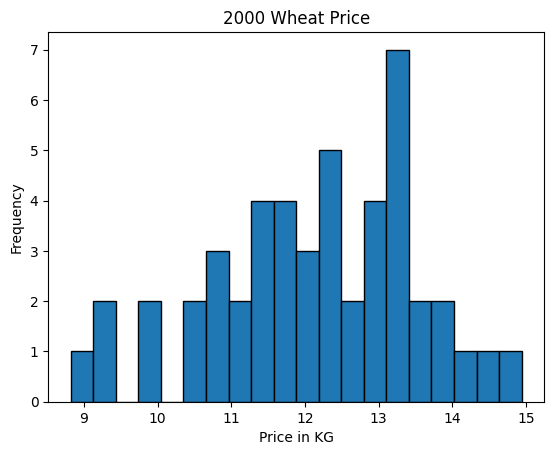

In [34]:
# Create a histogram
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.hist(wheat_2000["price"], bins=20, edgecolor='k')
plt.title('2000 Wheat Price')
plt.xlabel('Price in KG')
plt.ylabel('Frequency')
plt.show()

### Wheat Price over Years

In [25]:
wheat_kabul = wheat[wheat['market'] == "Kabul"]
print(wheat_kabul.shape)
wheat_kabul.head()

(285, 16)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,date_obj,year
8,2000-01-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,13.75,0.2939,2000-01-15,2000
26,2000-02-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,12.32,0.2612,2000-02-15,2000
47,2000-03-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,11.72,0.2473,2000-03-15,2000
70,2000-04-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,13.56,0.2869,2000-04-15,2000
97,2000-05-15,Kabul,Kabul,Kabul,34.516667,69.183333,cereals and tubers,Wheat,KG,actual,Retail,AFN,13.56,0.2869,2000-05-15,2000


#### New package to install:

In [ ]:
!pip install plotly

In [29]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=wheat_kabul['date'], y=wheat_kabul['price'],
                    mode='lines',
                    name='markers'))

fig.show()

In [30]:
import plotly.express as px
fig = px.line(wheat, x='date', y='price', color='market', markers=True)
fig.show()

### How do you think about the Wheat price in Kandahar and Kabul in year 2022

### Do you see any different between Wheat price and Wheat Flour price in Kabul, Nangarhar, Balkh